In [1]:
import numpy as np
import torch
%matplotlib inline
import matplotlib.pyplot as plt
from torch import nn, optim, autograd
from torch.nn import functional as F
from pyDOE import lhs
import scipy.io

#Paper reproduction
torch.manual_seed(1234)
torch.cuda.manual_seed(1234)
np.random.seed(1234)
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)
        nn.init.constant_(m.bias, 0)
    elif isinstance(m, nn.Conv2d):
        #nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        nn.init.xavier_normal_(m.weight)
        nn.init.constant_(m.bias, 0)
    elif isinstance(m, nn.BatchNorm2d):
        nn.init.constant_(m.weight, 1)
        nn.init.constant_(m.bias, 0)

In [3]:
class hidden_layers(nn.Module):
    def __init__(self,input_number,output_number):
        super(hidden_layers, self).__init__()
        self.layer = nn.Linear(input_number,output_number)
    def forward(self, x):
        x = self.layer(x)
        x = torch.sin(x)
        return x

In [4]:
class NN_H1 (nn.Module):
    def __init__(self,in_N, width, depth, out_N):
        #depth = layers-2
        super(NN_H1, self).__init__()
        self.in_N = in_N
        self.width = width
        self.depth = depth
        self.out_N = out_N

        self.stack = nn.ModuleList()

        self.stack.append(nn.Linear(in_N, width))

        for i in range(depth):
            self.stack.append(nn.Linear(width, width))

        self.stack.append(nn.Linear(width, out_N))
        
        
    def forward(self, x):
        for m in self.stack:
            x = m(x)
        return x

In [5]:
class NN_H2 (nn.Module):
    def __init__(self,in_N, width, depth, out_N):
        #depth = layers-2
        super(NN_H2, self).__init__()
        self.in_N = in_N
        self.width = width
        self.depth = depth
        self.out_N = out_N

        self.stack = nn.ModuleList()

        self.stack.append(hidden_layers(in_N, width))

        for i in range(depth):
            self.stack.append(hidden_layers(width, width))

        self.stack.append(nn.Linear(width, out_N))
        
        
    def forward(self, x):
        for m in self.stack:
            x = m(x)
        return x

In [6]:
class get_discriminator(nn.Module):
    def __init__(self,in_N, width, depth, out_N):
        #depth = layers-2
        super(get_discriminator, self).__init__()
        self.in_N = in_N
        self.width = width
        self.depth = depth
        self.out_N = out_N

        self.stack = nn.ModuleList()

        self.stack.append(hidden_layers(in_N, width))

        for i in range(depth):
            self.stack.append(hidden_layers(width, width))

        self.stack.append(nn.Linear(width, out_N))
        
        
    def forward(self, x):
        for m in self.stack:
            x = m(x)
        x = torch.sigmoid(x)
        return x 

In [7]:
PINNs1 = torch.load('../saved_model/PINNs1')
PINNs2 = torch.load('../saved_model/PINNs2')
PINNs3 = torch.load('../saved_model/PINNs3')
PINNs4 = torch.load('../saved_model/PINNs4')
PINNs5 = torch.load('../saved_model/PINNs5')

In [8]:
traindata = np.concatenate((np.linspace(0,1,400).reshape(-1,1),np.linspace(0,1,400).reshape(-1,1)),1)
x_ = traindata[:,0:1]
y_ = traindata[:,1:2]
xx,yy = np.meshgrid(x_,y_)
data_numpy = np.concatenate((xx.reshape(-1,1),yy.reshape(-1,1)),1)
data_tensor = torch.from_numpy(data_numpy).float()
real_data = 1/(2*np.pi**2)*np.sin(data_numpy[:,0:1]*np.pi)*np.sin(data_numpy[:,1:2]*np.pi)

In [9]:
e1 = np.abs(real_data-PINNs1(data_tensor).detach().numpy())
e2 = np.abs(real_data-PINNs2(data_tensor).detach().numpy())
e3 = np.abs(real_data-PINNs3(data_tensor).detach().numpy())
e4 = np.abs(real_data-PINNs4(data_tensor).detach().numpy())
e5 = np.abs(real_data-PINNs5(data_tensor).detach().numpy())

In [10]:
e_values = [e1, e2, e3, e4, e5]
vmin=np.min(e2)
vmax=np.max(e2)

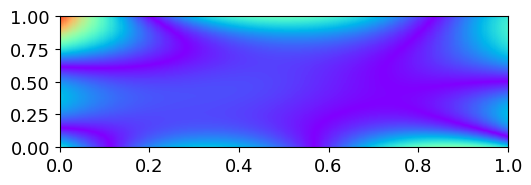

In [11]:
fig, ax = plt.subplots()
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)
ax = plt.subplot(gs0[:, :])

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
h = ax.imshow(e1.reshape(400,400), interpolation='nearest',
              extent=[0, 1, 0, 1], 
              origin='lower', aspect='auto', cmap='rainbow',vmin=vmin,
vmax=vmax)
divider = make_axes_locatable(ax)

plt.savefig('../figures/Poisson_loss_abs_1.eps',dpi=100, format='eps',bbox_inches = 'tight')

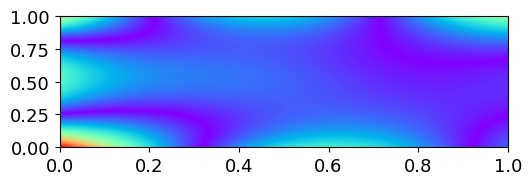

In [12]:
fig, ax = plt.subplots()
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)
ax = plt.subplot(gs0[:, :])

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
h = ax.imshow(e2.reshape(400,400), interpolation='nearest',
              extent=[0, 1, 0, 1], 
              origin='lower', aspect='auto', cmap='rainbow',vmin=vmin,
vmax=vmax)
divider = make_axes_locatable(ax)

plt.savefig('../figures/Poisson_loss_abs_2.eps',dpi=100, format='eps',bbox_inches = 'tight')

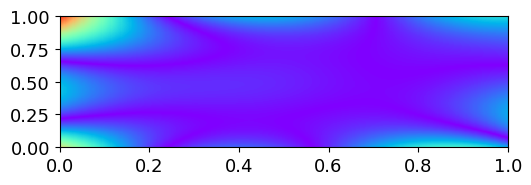

In [13]:
fig, ax = plt.subplots()
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)
ax = plt.subplot(gs0[:, :])

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
h = ax.imshow(e3.reshape(400,400), interpolation='nearest',
              extent=[0, 1, 0, 1], 
              origin='lower', aspect='auto', cmap='rainbow',vmin=vmin,
vmax=vmax)
divider = make_axes_locatable(ax)

plt.savefig('../figures/Poisson_loss_abs_3.eps',dpi=100, format='eps',bbox_inches = 'tight')

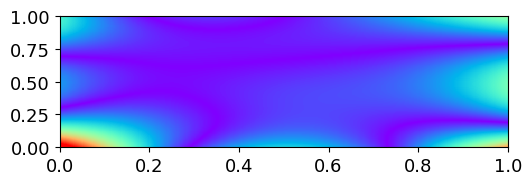

In [14]:
fig, ax = plt.subplots()
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)
ax = plt.subplot(gs0[:, :])

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
h = ax.imshow(e4.reshape(400,400), interpolation='nearest',
              extent=[0, 1, 0, 1], 
              origin='lower', aspect='auto', cmap='rainbow',vmin=vmin,
vmax=vmax)
divider = make_axes_locatable(ax)

plt.savefig('../figures/Poisson_loss_abs_4.eps',dpi=100, format='eps',bbox_inches = 'tight')

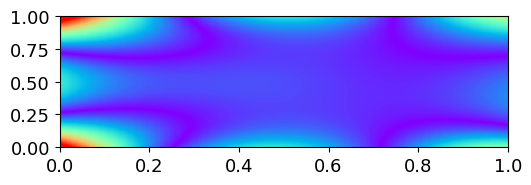

In [15]:
fig, ax = plt.subplots()
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)
ax = plt.subplot(gs0[:, :])

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
h = ax.imshow(e5.reshape(400,400), interpolation='nearest',
              extent=[0, 1, 0, 1], 
              origin='lower', aspect='auto', cmap='rainbow',vmin=vmin,
vmax=vmax)
divider = make_axes_locatable(ax)

plt.savefig('../figures/Poisson_loss_abs_5.eps',dpi=100, format='eps',bbox_inches = 'tight')

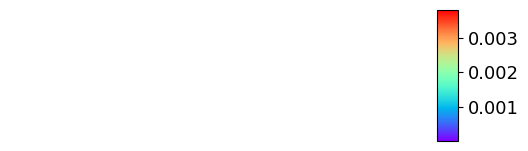

In [16]:
fig = plt.figure()
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)

ax = plt.subplot(gs0[:, :])
ax.axis('off') 

h = ax.imshow(e5.reshape(400,400), interpolation='nearest',
              extent=[0, 1, 0, 1], 
              origin='lower', aspect='auto', cmap='rainbow',vmin=vmin,
vmax=vmax)
h.set_visible(False) 

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = fig.colorbar(h, cax=cax)
cb.ax.tick_params(labelsize=13) 

ticks = [0.003,0.002,0.001]
cb.set_ticks(ticks) 
cb.ax.tick_params(labelsize=13) 

plt.savefig('../figures/Poisson_loss_abs_bar.pdf', dpi=100, format='pdf', bbox_inches='tight')